In [ ]:
def oneWayFunction(num):
    for i in range(5):
        numStr = str(num)
        length = len(numStr)
        if length < 3:
            num += num
        else:
            choosenPart = numStr[0:length//2] + numStr[length//2+1::] 
            choosenPart = int(choosenPart)
            num *= choosenPart
        while num % 10 == 0:
            num = int(num / 10)
    
    return num

In [ ]:
oneWayFunction(12399999999999999942384234723412312384324149283192384323412999999999432843749123233)

In [ ]:
oneWayFuncComb(124)

In [ ]:
def brute_force_attack(target_output):
    for candidate_input in range(1,100000):  # Adjust the range based on your constraints
        if oneWayFunction(candidate_input) == target_output:
            return candidate_input

# Example usage:
target_output = oneWayFunction(12399999999999999942384234723412312384324149283192384323412999999999432843749123233)  # Replace 42 with the actual target output
candidate_input = brute_force_attack(target_output)

print("Target Output:", target_output)
print("Candidate Input:", candidate_input)


In [ ]:
def reverseOneWayFunction(result_num):
    result_str = str(result_num)
    length = len(result_str)

    # Reverse the removal of trailing zeros
    while result_num % 10 == 0:
        result_num = int(result_num / 10)

    # Reverse the operations in the loop
    for i in range(5):
        if length < 3:
            result_num = int(result_num / 2)  # Assuming the doubling operation
        else:
            # Reverse the multiplication by a part of the number
            choosenPart = int(result_str[length // 2])
            result_num = int(result_num / choosenPart)

    return result_num

# Example usage
original_number = 12345
generated_result = oneWayFunction(original_number)
reversed_number = reverseOneWayFunction(generated_result)

print("Original Number:", original_number)
print("Generated Result:", generated_result)
print("Reversed Number:", reversed_number)


In [ ]:
import random
def oneWayFunction(num):
    for i in range(100):
        numStr = str(num)
        length = len(numStr)
        if length < 3:
            num += num
        else:
            choosenPart = numStr[0:length//2] + numStr[length//2+1::] 
            choosenPart = int(choosenPart)
            num += choosenPart
    
    return num

def generate_input_output_pairs(num_pairs):
    pairs = []
    for _ in range(num_pairs):
        input_value = random.randint(0, 1000000)
        output_value = oneWayFunction(input_value)
        pairs.append((input_value, output_value))
    return pairs

def differential_cryptanalysis_simulation(pairs, target_output):
    successful_attacks = 0

    for i in range(len(pairs)):
        for j in range(i+1, len(pairs)):
            pair1 = pairs[i]
            pair2 = pairs[j]

            input1, output1 = pair1
            input2, output2 = pair2

            # Check if the outputs are close to the target
            if abs(output1 - target_output) < 10 and abs(output2 - target_output) < 10:
                # Check if the inputs have a small difference
                if abs(input1 - input2) < 5:
                    successful_attacks += 1
                    # If conditions are met, print the inferred information
                    inferred_info = {'input_difference': abs(input1 - input2), 'output_difference': abs(output1 - output2)}
                    print(f"Successful Attack #{successful_attacks}: {inferred_info}")

    return successful_attacks

# Simulation parameters
num_pairs = 100
target_output = oneWayFunction(12399999999999999942384234723412312384324149283192384323412999999999432843749123233)

# Generate input-output pairs
pairs = generate_input_output_pairs(num_pairs)

# Run differential cryptanalysis simulation
successful_attacks = differential_cryptanalysis_simulation(pairs, target_output)

print(f"\nTotal Successful Attacks: {successful_attacks}")


In [ ]:
import random

def oneWayFunction(num):
    for i in range(10000):
        numStr = str(num)
        length = len(numStr)
        if length < 3:
            num += num
        else:
            choosenPart = numStr[0:length//2] + numStr[length//2+1::] 
            choosenPart = int(choosenPart)
            num += choosenPart
    
    return num

def realistic_chosen_plaintext_attack(target_output, max_attempts=10000):
    known_inputs = set()

    for num_attempts in range(1, max_attempts + 1):
        # Simulate an adversary choosing inputs strategically
        if num_attempts % 2 == 0:
            plaintext = random.randint(1, 500000)
        else:
            plaintext = random.randint(500001, 1000000)

        # Check if we already know the output for this plaintext
        if plaintext in known_inputs:
            continue

        # Query the oneWayFunction with the chosen plaintext
        ciphertext = oneWayFunction(plaintext)

        # Check if the output matches the target output
        if ciphertext == target_output:
            print(f"Realistic Chosen-Plaintext Attack Successful after {num_attempts} attempts.")
            print(f"Plaintext: {plaintext}, Ciphertext: {ciphertext}")
            break

        # Record the known output for this plaintext
        known_inputs.add(plaintext)

# Simulation parameters
target_output = oneWayFunction(1)

# Run realistic chosen-plaintext attack simulation with a limit of 10,000 attempts
realistic_chosen_plaintext_attack(target_output, max_attempts=10000000)


In [ ]:
import random

def oneWayFunction(num):
    for i in range(1000):
        numStr = str(num)
        length = len(numStr)
        if length < 3:
            num += num
        else:
            choosenPart = numStr[0:length//2] + numStr[length//2+1::] 
            choosenPart = int(choosenPart)
            num += choosenPart
    
    return num

def side_channel_attack(target_output):
    known_inputs = set()
    num_attempts = 0

    while True:
        # Simulate an attacker with partial knowledge about input length
        if num_attempts % 2 == 0:
            plaintext = random.randint(0, 999)  # Shorter input length
        else:
            plaintext = random.randint(1000, 9999)  # Longer input length

        # Check if we already know the output for this plaintext
        if plaintext in known_inputs:
            continue

        # Query the oneWayFunction with the chosen plaintext
        ciphertext = oneWayFunction(plaintext)
        num_attempts += 1

        # Check if the output matches the target output
        if ciphertext == target_output:
            print(f"Side-Channel Attack Successful after {num_attempts} attempts.")
            print(f"Plaintext: {plaintext}, Ciphertext: {ciphertext}")
            break

        # Record the known output for this plaintext
        known_inputs.add(plaintext)

# Simulation parameters
target_output = oneWayFunction(12345)

# Run side-channel attack simulation
side_channel_attack(target_output)


In [ ]:
results = []
for i in range(1,10000):
    result = oneWayFunction(i)
    results.append(result)

In [ ]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(results))], sorted(results), linestyle='-', color='b',label="values")
plt.xlabel('Number of Iterations')
plt.ylabel('Mapped Values')
plt.title('Execution Time vs Number of Iterations')
plt.grid(True)
plt.show()

In [ ]:
def oneWayFunction(num):
    for i in range(100):
        numStr = str(num)
        length = len(numStr)
        if length < 3:
            num += num
        else:
            choosenPart = numStr[0:length//2] + numStr[length//2+1::] 
            choosenPart = int(choosenPart)
            num += choosenPart
    
    return num

def reverseOneWayFunction(result_num):
    for i in range(100):
        str_result = str(result_num)
        length = len(str_result)

        if length < 3:
            result_num //= 2
        else:
            choosenPart = int(str_result[length//2])
            result_num -= choosenPart * 10**(length // 2)

    return result_num

# Example usage
original_number = 12346
generated_result = oneWayFunction(original_number)
reversed_number = reverseOneWayFunction(generated_result)

print("Original Number:", original_number)
print("Generated Result:", generated_result)
print("Reversed Number:", reversed_number)


In [ ]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(boolsValSums))], sorted(boolsValSums), linestyle='-', color='b',label="values")
plt.xlabel('Number of Iterations')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Iterations')
plt.grid(True)
plt.show()

In [ ]:
def oneWayFunction2(num):
    for i in range(1,num):
        if num > i:
            num /= num/i
        elif num < i/2:
            num *= num/i
        else:
            num += num

    return num

In [ ]:
oneWayFunction2(6)

In [ ]:
results = []
for i in range(1,10**4):
    result = oneWayFunction2(i)
    results.append(result)

In [ ]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(results))], sorted(results), linestyle='-', color='b',label="values")
plt.xlabel('Number of Iterations')
plt.ylabel('Function Returns')
plt.title('Execution Time vs Number of Iterations')
plt.grid(True)
plt.show()

In [ ]:
def oneWayFunction2(num):
    for i in range(1, num):
        if num > i:
            num /= num/i
        elif num < i/2:
            num *= num/i
        else:
            num += num

    return num

def reverseOneWayFunction2(result_num):
    i = 1
    while i < result_num:
        # Reverse the logic of the third condition in oneWayFunction2
        if result_num > i and result_num % 2 == 0:
            result_num -= result_num  # Reverse the doubling in oneWayFunction2
            print('reverse if 3')

        # Reverse the logic of the second condition in oneWayFunction2
        elif result_num < i/2:
            result_num /= result_num/i
            print('reverse elif 2')

        # Reverse the logic of the first condition in oneWayFunction2
        elif result_num > i:
            result_num *= result_num/i
            print('reverse elif 1')
        
        i += 1

    return result_num

# Example usage
original_number = 12345
generated_result = oneWayFunction2(original_number)
reversed_number = reverseOneWayFunction2(generated_result)

print("Original Number:", original_number)
print("Generated Result:", generated_result)
print("Reversed Number:", reversed_number)


In [ ]:
def oneWayFunction3(num):
    for i in range(1,num):
        total = 0
        for j in range(10):
            total += j
            if total % 2 == 0:
                total -= total/ (i/2)
            else:
                total += j * j
        num += total

    return num

In [ ]:
oneWayFunction3(3)

In [ ]:
def reverseOneWayFunction3(result_num):
    i = 1
    while i < result_num:
        total = 0
        for j in range(10):
            total += j
            if total % 2 == 0:
                total += total / (i/2)
            else:
                total -= j * j
        if total == result_num:
            return i
        i += 1

    return None  # If no match is found

# Example usage
generated_result = oneWayFunction3(10)  # Replace with the actual result_num
reversed_num = reverseOneWayFunction3(generated_result)

print("Generated Result:", generated_result)
print("Reversed Num:", reversed_num)



In [ ]:
results = []
for i in range(1,10**3):
    result = oneWayFunction3(i)
    results.append(result)

In [ ]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(results))], sorted(results), linestyle='-', color='b',label="values")
plt.xlabel('Number of Iterations')
plt.ylabel('Function Returns')
plt.title('Execution Time vs Number of Iterations')
plt.grid(True)
plt.show()

In [ ]:
def oneWayFunction4(num):
    i = 1
    for k in range(3):
        num = num + num * i
        i = num / 2
        for j in range(1,30):
            i += i/num
            num += num / j
        num -= i
        i += 1

    return num

    

In [ ]:
print(oneWayFunction4(10000))

In [ ]:
def reverseOneWayFunction4(result_num):
    i = 1
    k = 0
    num = result_num  # Initialize num with the given result_num
    while k < 2:
        i -= 1
        j = 9
        while j >= 1:
            if i != 0:  # Avoid division by zero
                num = (num - i) * j / i
                i -= i / num
            else:
                break  # Break out of the loop to avoid division by zero
            j -= 1
        if i != 0:  # Avoid division by zero
            num /= (1 + i)
            i = num / 2
        else:
            break  # Break out of the outer loop to avoid division by zero
        k += 1
    return num

# Example usage
generated_result = oneWayFunction4(84)
reversed_num = reverseOneWayFunction4(generated_result)

print("Generated Result:", generated_result)
print("Reversed Num:", reversed_num)


In [ ]:
results = []
for i in range(1,10**3):
    result = oneWayFunction4(i)
    results.append(result)

In [ ]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(results))], sorted(results), linestyle='-', color='b',label="values")
plt.xlabel('Number of Iterations')
plt.ylabel('Function Returns')
plt.title('Execution Time vs Number of Iterations')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import random

limit = 100

# Generate random coordinates
x = random.uniform(0, limit)
y = random.uniform(0, limit)

# Plot the random point
plt.plot(range(limit))
plt.scatter(x, y, color='red', marker='o')
plt.title('Random Point on 2D Plane')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()



# Ciphher One System

In [3]:
import string
import random
def charNumComb(num,message):
   num = num % 1000
   chars = message
   keys = [int(random.uniform(i,int(num**(1/2)))) for i in range(1,int(num**(1/2)))] 
   nums = keys[:]
   stringVals = []
   x = 0
   iter = 0
   while len(stringVals) < 1000:
      x = keys[0]
      num_start = nums[x]
      nums.append(x)
      stringVals.append(str(num_start))
      for i in range(3):
         x += iter + i
         x = int(x**2/(iter+1)) % len(chars)
         stringVals.append(chars[x])
      nums = sorted([(i+num) for i in nums])
      iter += 1

   return "".join(stringVals),keys

In [2]:
charNumComb(12392930432,"do you know what that is")

('16oow450n w882dy 1313ohw1744dud2176hdn2608t d3040w t3471w y3903owo4335nnw4767no 5198no 5628nwt6060n d6491nwo6919nwo6927nhn6927otd6927oho6927w  6927wit6927  u6927w  6927w  6927hwo6927aat6927th 6927thk6927 i 6927t h6927h s6927h d6927aw 6927tas6927 hw6927iio6927soh6927dtu6927d o6927oah6927 io6927yos6927oo 6927uka6927 wi6927kao6927nth6927oto6927o k6927wdu6927 oa6927wki6927h n6927aat6927tho6927  h6927tdw6927ho 6927ank6927t t6927 t 6927ihw6927sii6927dto6927dhh6927o i6927 di6927yyu6927o w6927uot6927 wo6927ktw6927nht6927oin6927won6927 ot6927wki6927h n6927aa 6927tto6927   6927tdh6927hyt6927aku6927twh6927 as6927itk6927stt6927dhw6927o t6927 di6927yyu6927o w6927uot6927 wy6927kt 6927nha6927nas6927oik6927woo6927 uh6927wno6927h o6927aat6927thy6927   6927tda6927hy 6927ak 6927twa6927 h 6927itk6927stt6927daa6927oii6927 oo6927yon6927okt6927uws6927 h 6927k a6927nai6927oi 6927woo6927 o 6927wno6927h o6927aa 6927ttd6927 tn6927tda6927hy 6927a o6927to 6927 h 6927i u6927saw6927dah6927oi 6927 oo6927yon6927okt6

In [ ]:
import string

def attackCharNumComb(ciphertext):
    chars = string.ascii_letters
    nums = [1, 2, 3, 4, 5, 6, 7, 8, 9]

    result = []
    x = 0

    for i in range(len(ciphertext)):
        x = x % len(nums)
        num_start = nums[x]
        nums.append(x)

        # Move to the next character in the ciphertext
        x += i
        x = x % len(chars)

        # Append the corresponding character from the character set
        result.append(chars[x])

        # Move to the next numeric value in the original sequence
        x += 1

    # Join the result list to get the attacked plaintext
    attacked_text = "".join(result)

    return attacked_text

# Example usage
num_to_attack = 10  # Replace with the actual input to charNumComb
ciphertext_to_attack = charNumComb(num_to_attack)
attacked_result = attackCharNumComb(ciphertext_to_attack)

print("Original Num:", num_to_attack)
print("Ciphertext:", ciphertext_to_attack)
print("Attacked Result:", attacked_result)


In [4]:
import string

def chiperOne(num, message):
    val = num
    x = 0.1
    messageList = list(message)
    chars = string.ascii_letters
    stringVal = ''

    for i in range(1, len(messageList)):
        num = int(num * (1 - x))
        letter = chars[messageList.index(messageList[num % len(message)]) % len(chars)]
        stringVal += letter
        stringVal += str(num)

        # Adjust num based on conditions
        while num < val * 0.4:
            num = int(num * (1 + x))
            if num < val * 0.1 or num < 0:
                break
        while num > val * 0.6:
            num = int(num * (1 - x))
            if num > val * 2 or num < 0:
                break
        num = abs(num**(1/2))

        x += 1 / x

    return stringVal

# Example usage
num_to_encrypt = 1000
message_to_encrypt = "what is this"
ciphertext = chiperOne(num_to_encrypt, message_to_encrypt)

print("Original Num:", num_to_encrypt)
print("Ciphertext:", ciphertext)


Original Num: 1000
Ciphertext: a900e-221b-455b-663e-812a-912d-981b-1031d-1072d-1108g-1141


In [10]:
chiperOne(len(),"what is this dialoblic system that rewards")

'q89999999999999993876697845098623117739340772855152911474021622402307855115556183498193921454781273150584746676909065886472213448953844137957338775965189557862993367853951931189543498629033814166339584f-69927445899303366326559603238542908793633763653693774009322506244708813221263944382935909508898095104d-8104503397327136481419676685142762392493357635993600e-2800906352628381491029606400f-1671054344826118d-1309544847g-1175849f-35728e-6313g-2689C-1778f-1465J-1347B-1308J-1305g-1319c-1342q-1370C-1400c-1432g-1464c-1497g-1531b-1565J-1599f-1633e-1668q-1703d-1738d-1773n-1808e-1844f-1880q-1916v-1953d-1990b-2027B-2064g-2101d-2139e-2177'

In [11]:
import random
def realistic_chosen_plaintext_attack(target_output, max_attempts=10000):
    known_inputs = set()

    for num_attempts in range(1, max_attempts + 1):
        # Simulate an adversary choosing inputs strategically
        if num_attempts % 2 == 0:
            plaintext = random.randint(10**20, 10**21 / 2)
        else:
            plaintext = random.randint(10**21/2+1, 10**21)

        # Check if we already know the output for this plaintext
        if plaintext in known_inputs:
            continue

        # Query the oneWayFunction with the chosen plaintext
        ciphertext = chiperOne(plaintext,'this is good')

        # Check if the output matches the target output
        if ciphertext == target_output:
            print(f"Realistic Chosen-Plaintext Attack Successful after {num_attempts} attempts.")
            print(f"Plaintext: {plaintext}, Ciphertext: {ciphertext}")
            break

        # Record the known output for this plaintext
        known_inputs.add(plaintext)

# Simulation parameters
target_output = chiperOne(random.randint(10**20,10**21),'this is good')
print(target_output)

# Run realistic chosen-plaintext attack simulation with a limit of 10,000 attempts
realistic_chosen_plaintext_attack(target_output, max_attempts=10000000)


i193947370492383199232c-102652223095e-9819440d-97494d-9858a-3180e-1832d-1410d-1254c-1198b-1187


KeyboardInterrupt: 

In [ ]:
chiperOne(12384739203429394923402030402394910230032349938283400123,"I cannot understand thi specific genre ")

In [75]:
import numpy as np

def oneWayFunctionList(array=None, iter=5,num =10):
    # Initialize array if not provided
    if array is None:
        array = [i for i in range(num,iter+num)]
        array = [sum(array[0:i]) for i in range(num,iter+num)]
    
    # Calculate mean and median only once to avoid recalculating
    mean_value = np.mean(array)
    median_value = np.median(array)

    loop = iter
    
    # Check the condition using the calculated mean and median
    if mean_value < median_value:
        array.extend(range(int(mean_value), int(median_value)))
        for i in range(len(array)):
            array.append(median_value + min(array))
            if array[i] < median_value:
                array.remove(array[i])
    else:
        array.extend(range(int(median_value), int(mean_value)))
        for i in range(len(array)):
            array.append(mean_value+min(array))
            if array[i] < mean_value:
                array.remove(array[i])
    
    iter -= 1
    if iter <= 0:
        return list(np.unique(array))
    
    # Recursive call with the updated array
    return oneWayFunctionList(array, iter)

# Example usage:
result_array = oneWayFunctionList()
print(result_array)


[135.0, 143.0, 150.0, 185.0, 189.0, 193.0, 197.0, 201.0, 205.0, 209.0, 210.0, 274.0, 276.0, 278.0, 280.0, 282.0, 284.0, 286.0, 288.0, 290.0, 292.0, 294.0, 296.0, 298.0, 300.0, 302.0, 304.0, 306.0, 308.0, 310.0, 312.0, 314.0, 316.0, 318.0, 320.0, 322.0, 324.0, 326.0, 328.0, 330.0, 450.0, 461.0, 465.0]


In [76]:
result_array = oneWayFunctionList(iter=8)
print(result_array)

[250.0, 345.0, 377.0, 378.0, 432.0, 448.0, 464.0, 480.0, 486.0, 596.0, 604.0, 612.0, 620.0, 628.0, 636.0, 644.0, 652.0, 660.0, 668.0, 676.0, 684.0, 692.0, 700.0, 702.0, 809.0, 813.0, 817.0, 821.0, 825.0, 829.0, 833.0, 837.0, 841.0, 845.0, 849.0, 853.0, 857.0, 861.0, 865.0, 869.0, 873.0, 877.0, 881.0, 885.0, 889.0, 893.0, 897.0, 901.0, 905.0, 909.0, 913.0, 917.0, 921.0, 925.0, 929.0, 933.0, 936.0, 1044.0, 1046.0, 1048.0, 1050.0, 1052.0, 1054.0, 1056.0, 1058.0, 1060.0, 1062.0, 1064.0, 1066.0, 1068.0, 1070.0, 1072.0, 1074.0, 1076.0, 1078.0, 1080.0, 1082.0, 1084.0, 1086.0, 1088.0, 1090.0, 1092.0, 1094.0, 1096.0, 1098.0, 1100.0, 1102.0, 1104.0, 1106.0, 1108.0, 1110.0, 1112.0, 1114.0, 1116.0, 1118.0, 1120.0, 1122.0, 1124.0, 1126.0, 1128.0, 1130.0, 1132.0, 1134.0, 1136.0, 1138.0, 1140.0, 1142.0, 1144.0, 1146.0, 1148.0, 1150.0, 1152.0, 1154.0, 1156.0, 1158.0, 1160.0, 1162.0, 1164.0, 1166.0, 1168.0, 1170.0, 1172.0, 1174.0, 1176.0, 1178.0, 1180.0, 1182.0, 1184.0, 1186.0, 1436.0]


In [89]:
def createSequence(num=3):
    result_array = oneWayFunctionList(iter=3,num=num)

    for i in range(10):
        print(i)
        result_array = oneWayFunctionList(result_array.copy(), iter=3,num=num)

    return result_array

resultFinal = createSequence(num=10)


0
1
2
3
4
5
6
7
8
9


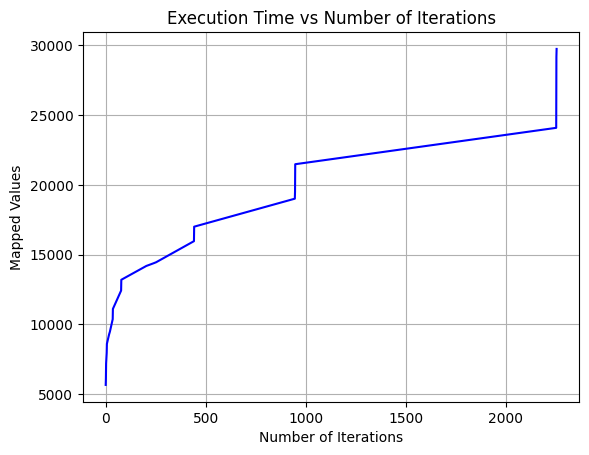

In [90]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(resultFinal))], sorted(resultFinal), linestyle='-', color='b',label="values")
plt.xlabel('Number of Iterations')
plt.ylabel('Mapped Values')
plt.title('Execution Time vs Number of Iterations')
plt.grid(True)
plt.show()

# Root Chiper

In [92]:
import random
import numpy as np
import math


def rootsLimit(array,k):
    sumRoots = sum([val**k for val in array])
    return sumRoots,(((((np.mean(array)*len(array)))**k)*(1/k))*(len(array)))/(np.mean(array)**k) /2**(2) 

array = [int(random.uniform(1,10)) for i in range(100)]
rootsLimit(array,0.5)

(212.67347769736935, 499.99999999999994)

In [97]:
import time
acc = 0
iter = 1000
values_diff_1 = []
values_diff_2 = []
exec_time_1 = []
exec_time_2 = []
seq_main = np.zeros(10000)

for i in range(iter):
    length = int(random.uniform(10, 10000))
    seq_a = [int(random.uniform(5, 1000)) for _ in range(length)]
    seq_b = [int(random.uniform(5, 1000)) for _ in range(length)]

    start = time.time()
    result_1, convResult_1 = rootsLimit(seq_a, k=0.5)
    exec_time_1.append(time.time() - start)

    start = time.time()
    result_2, convResult_2 = rootsLimit(seq_b, k=0.5)
    exec_time_2.append(time.time() - start)

    # Extend seq_a and seq_b with zeros to match the length of seq_main
    seq_a_extended = np.concatenate([seq_a, np.zeros(len(seq_main) - len(seq_a))])
    seq_b_extended = np.concatenate([seq_b, np.zeros(len(seq_main) - len(seq_b))])

    if result_1 >= result_2 and convResult_1 >= convResult_2:
        seq_main += seq_a_extended + seq_b_extended
    elif result_1 < result_2 and convResult_1 < convResult_2:
        seq_main += seq_a_extended - seq_b_extended
    else:
        seq_main = seq_main / 2  # Updated this line to correct the calculation


In [98]:
seq_main

array([2765.06773323, 2135.54856674, 2336.57837651, ...,    0.        ,
          0.        ,    0.        ])